# Lloyd Banking Group Career Challenge

➢ Task A – Data Strategy : Understand and summarise the different behaviours or attributes between customers who paid back their loan and customers who did not

➢ Task B – Data Science: To use the historical data to design a process which predicts the likelihood of a new customer not paying back their loan

## 1. Understanding the data
This spreadsheet contains some information about Lloyds Banking Group customers (c. 18,324) that have previously had a loan with the bank. There are 31 variables including a unique ID for each customer.


| Field Number | Field Name             | Data Type          |  | Description (optional)                                                                                                                                          |
| ------------ | ---------------------- | ------------------ |  | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|              |                        |                    |  |                                                                                                                                                                 |  |
| 1            | id                     | Unique Identifer   |  | A unique ID for the loan listing.                                                                                                                               |  |
| 2            | addr_state             | Categoric Variable |  | The US state provided by the borrower in the loan application (address)                                                                                         |  |
| 3            | annual_inc             | Numeric Variable   |  | The annual income provided by the borrower during registration.                                                                                                 |  |
| 4            | emp_length             | Categoric Variable |  | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. Data captured as categorical. |
| 5            | emp_title              | Categoric Variable |  | The job title supplied by the Borrower when applying for the loan.                                                                                              |  |
| 6            | home_ownership         | Categoric Variable |  | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER                                              |  |
| 7            | installment            | Numeric Variable   |  | The monthly payment owed by the borrower if the loan originates.                                                                                                |  |
| 8            | loan_amnt              | Numeric Variable   |  | The listed amount of the loan applied for by the borrower.                                                                                                      |  |
| 9            | purpose                | Categoric Variable |  | A category provided by the borrower for the loan request.                                                                                                       |  |
| 10           | term                   | Categoric Variable |  | The number of payments on the loan. Values are in months and can be either 36 or 60.                                                                            |  |
| 11           | int_rate               | Numeric Variable   |  | Interest Rate on the loan                                                                                                                                       |  |
| 12           | avg_cur_bal            | Numeric Variable   |  | Average current balance of all current credit lending products / accounts                                                                                       |  |
| 13           | inq_last_12m           | Numeric Variable   |  | Number of credit inquiries (searches) in past 12 months                                                                                                         |  |
| 14           | max_bal_bc             | Numeric Variable   |  | Maximum current balance owed on all revolving accounts (a revolving account is a credit card or overdraft where the balance can fluctuate month on month)       |  |
| 15           | mo_sin_old_il_acct     | Numeric Variable   |  | Months since oldest bank installment account opened                                                                                                             |  |
| 16           | mo_sin_old_rev_tl_op   | Numeric Variable   |  | Months since oldest revolving account opened                                                                                                                    |  |
| 17           | mo_sin_rcnt_rev_tl_op  | Numeric Variable   |  | Months since most recent revolving account opened                                                                                                               |  |
| 18           | mo_sin_rcnt_tl         | Numeric Variable   |  | Months since most recent account opened                                                                                                                         |  |
| 19           | mort_acc               | Numeric Variable   |  | Number of mortgage accounts.                                                                                                                                    |  |
| 20           | mths_since_last_delinq | Numeric Variable   |  | The number of months since the borrower's last delinquency (missed payment).                                                                                    |  |
| 21           | num_bc_tl              | Numeric Variable   |  | Number of bankcard accounts                                                                                                                                     |  |
| 22           | num_il_tl              | Numeric Variable   |  | Number of installment accounts                                                                                                                                  |  |
| 23           | num_op_rev_tl          | Numeric Variable   |  | Number of open revolving accounts                                                                                                                               |  |
| 24           | num_tl_90g_dpd_24m     | Numeric Variable   |  | Number of accounts 90 or more days past due in last 24 months                                                                                                   |  |
| 25           | num_tl_op_past_12m     | Numeric Variable   |  | Number of accounts 90 or more days past due in last 24 months                                                                                                   |  |
| 26           | open_acc               | Numeric Variable   |  | The number of open credit lines in the borrower's credit file.                                                                                                  |  |
| 27           | percent_bc_gt_75       | Numeric Variable   |  | Percentage of all bankcard accounts > 75% of limit.                                                                                                             |  |
| 28           | pub_rec_bankruptcies   | Numeric Variable   |  | Number of public record bankruptcies                                                                                                                            |  |
| 29           | total_acc              | Numeric Variable   |  | The total number of credit lines currently in the borrower's credit file                                                                                        |  |
| 30           | total_bal_ex_mort      | Numeric Variable   |  | Total credit balance excluding mortgage                                                                                                                         |  |
| 31           | loan_status            | Categoric Variable |  | Current Status of Loan where customers have fully paid back their loan OR did not pay back their loan, in which case they are flagged as Charged-off            |  |
|              |                        |                    |  |                                                                                                                                                                 |  |

## 2. Explore the data distribution, relationships, and indictions

1. The correlations between these variables:

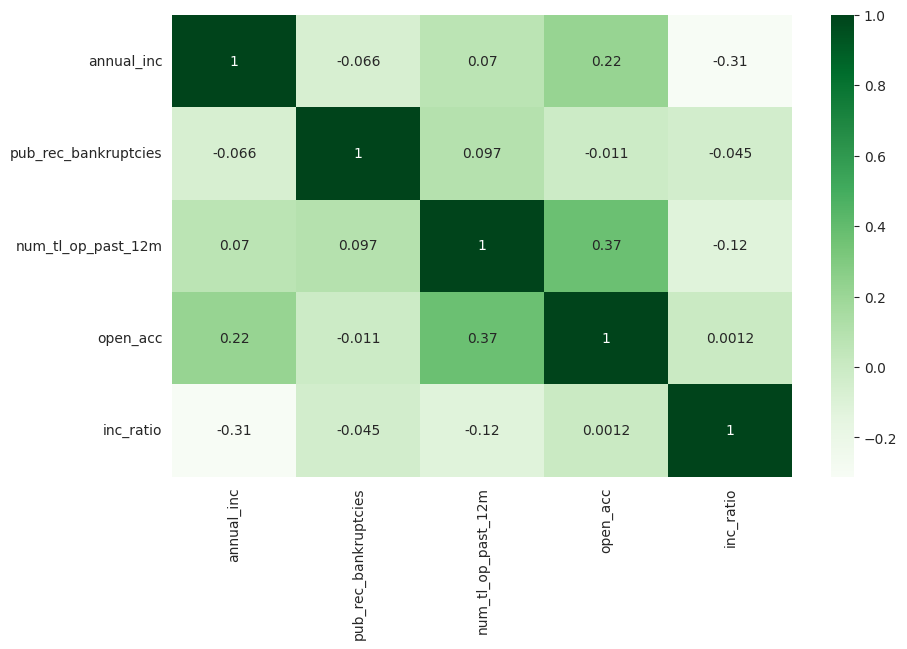




2. the Pairplot





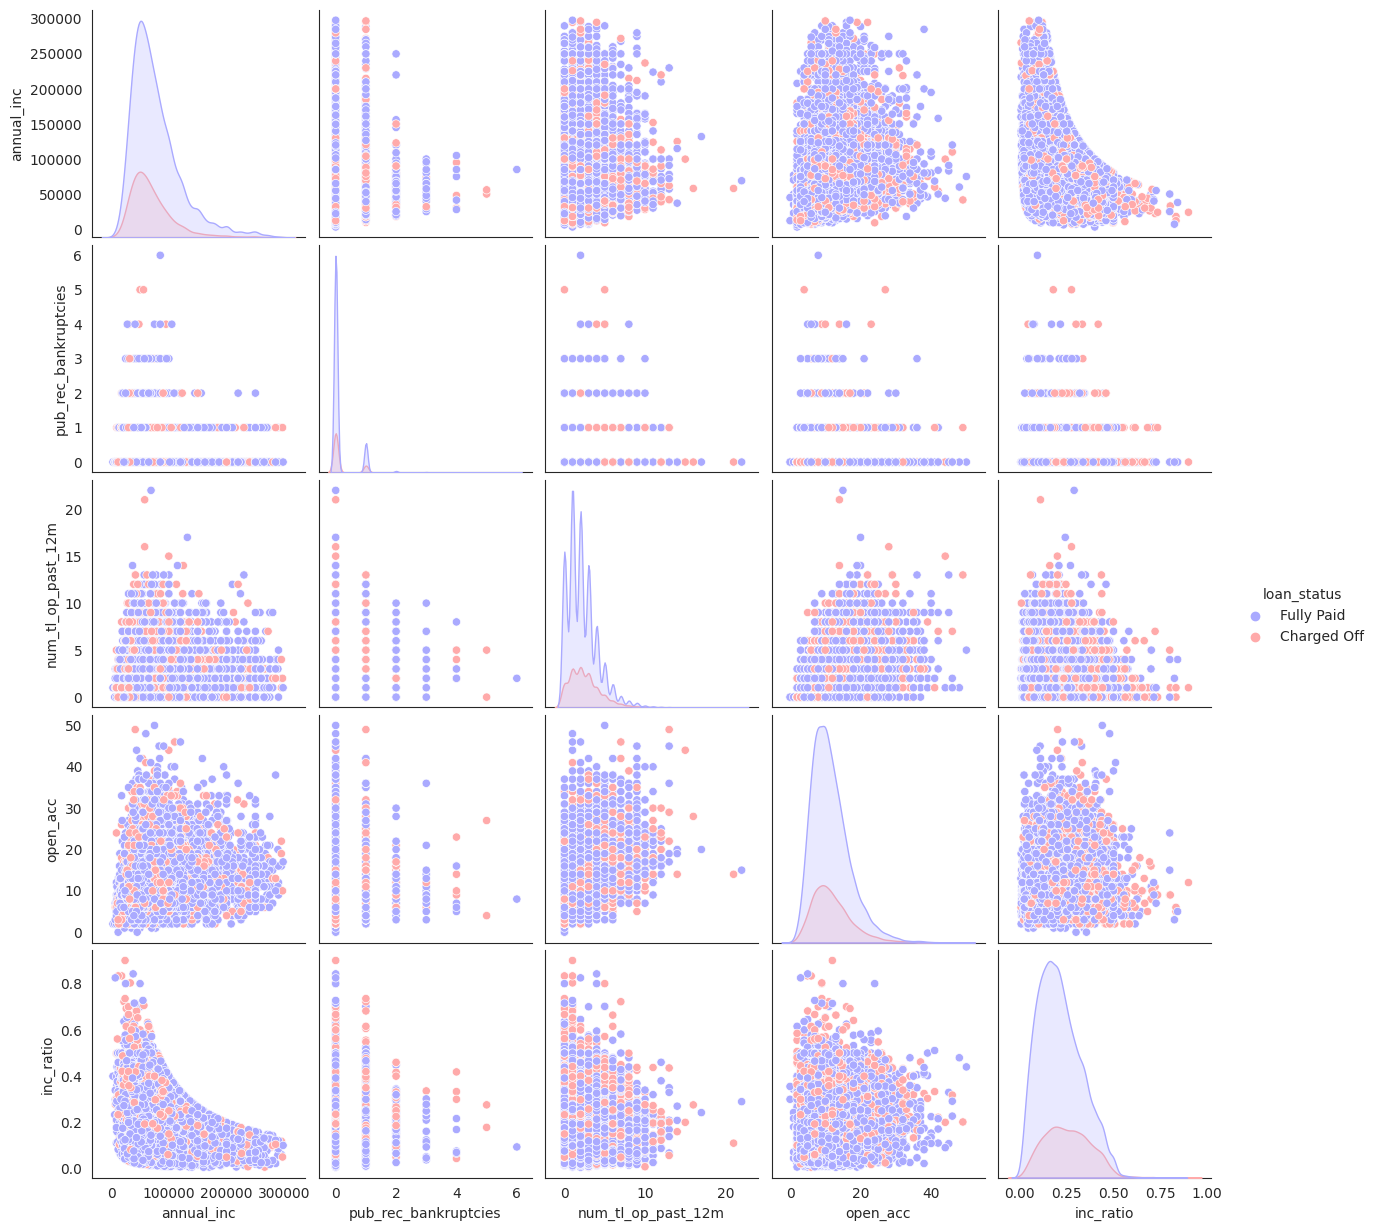

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Function to calculate and plot gini curve
def plot_roc(y_true, scores_names):
    '''
    plot ROC curves for the specified model scores

            Parameters:
                    y_true (num): Target variable
                    scores_names (tuple): a tuple of model predictions and model label
    '''

    for score, label in scores_names:
        fpr, tpr, _ = roc_curve(y_true, y_score=score, drop_intermediate=False)
        AUC = roc_auc_score(y_true, score)
        gini = 2 * AUC - 1
        label = 'Gini = {:.2%},  {}'.format(gini, label)
        plt.plot(fpr, tpr, label=label)
    plt.plot([0,1],[0,1], '--k')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right")
    plt.show();

In [4]:
url = 'https://raw.githubusercontent.com/Hongyan-Wang/LLoydsBankingGroup_CareerChallenge/main/LBG%20Step%20Up%20Data%20Set.csv'
df = pd.read_csv(url)
df.head()

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3 years,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36 months,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,TX,97500.0,1 year,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60 months,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1 year,Senior manager,RENT,806.57,25000,credit_card,36 months,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10+ years,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36 months,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10+ years,Account Manager,MORTGAGE,41.79,1200,other,36 months,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid


## 2. Exloratory Data Analysis

### 2.1 Annual Income

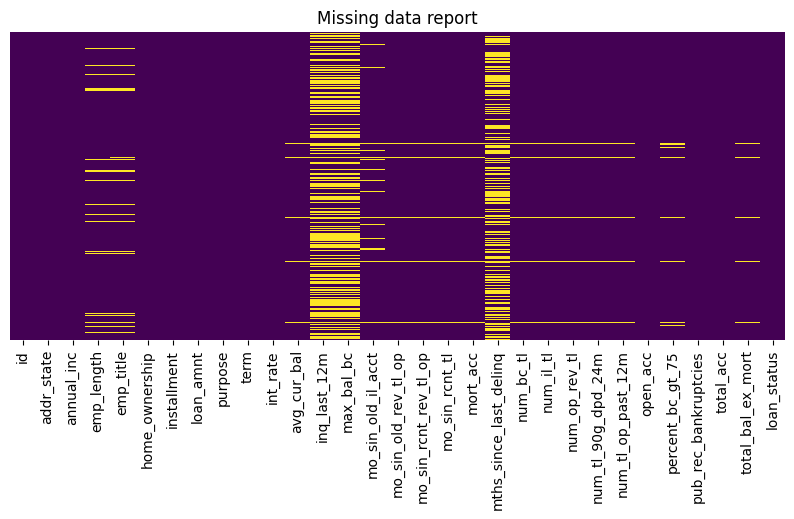

In [5]:
fig, ax1 = plt.subplots(figsize = (10,4))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis').set(title = 'Missing data report')
plt.show()

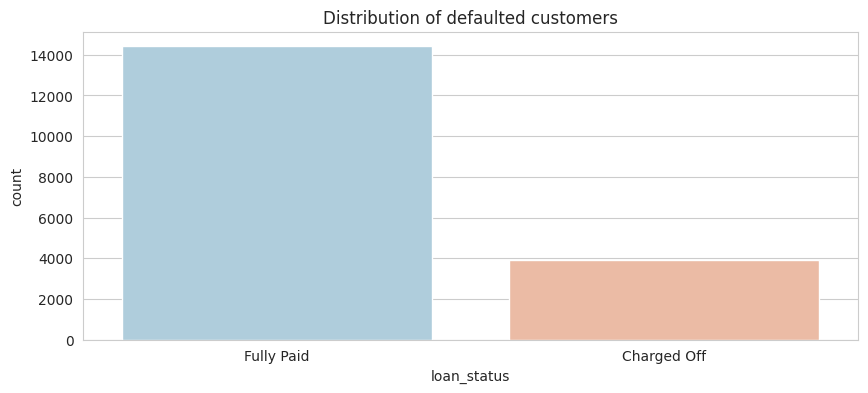

In [6]:
sns.set_style('whitegrid')
fig,ax1 = plt.subplots(figsize = (10,4))
sns.countplot(x='loan_status', data=df, palette = 'RdBu_r').set(title = 'Distribution of defaulted customers')
plt.show()

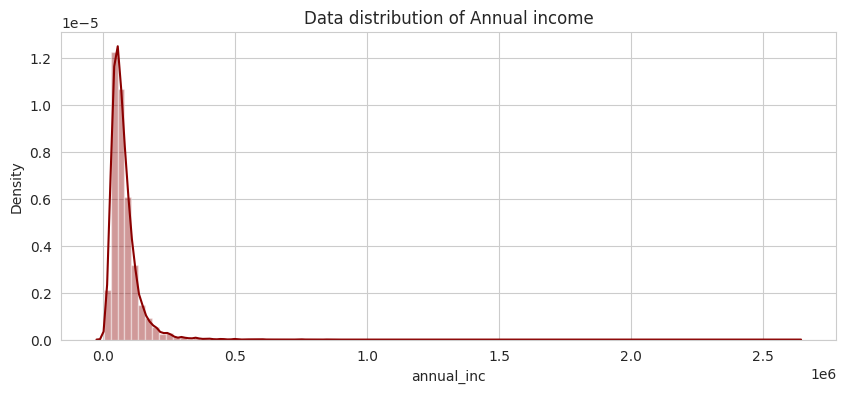

In [7]:
fig, ax1 = plt.subplots(figsize=(10,4))
sns.distplot(df['annual_inc'].dropna(),kde=True,color='darkred',bins=100).set(title='Data distribution of Annual income')
plt.show()

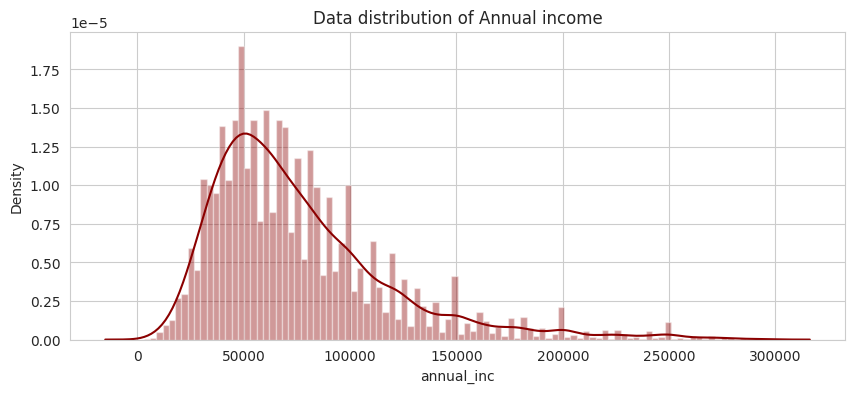

In [8]:
df = df[df['annual_inc'] < 300000]
fig, ax1 = plt.subplots(figsize=(10,4))
sns.distplot(df['annual_inc'].dropna(),kde=True,color='darkred',bins=100).set(title='Data distribution of Annual income')
plt.show()

In [9]:
df_grouped = df.groupby([pd.cut(df['annual_inc'], np.arange(0,1000.0+100000, 10000)),'loan_status']).size()
df_grouped_1 = df_grouped.groupby(level = 0).apply(lambda x:x/x.sum()*100).unstack(level = 'loan_status').reset_index()
df_grouped = df_grouped.groupby(level = 0).apply(lambda x:x).unstack(level='loan_status').reset_index()
df_grouped['Total']=df_grouped['Charged Off'] + df_grouped['Fully Paid']

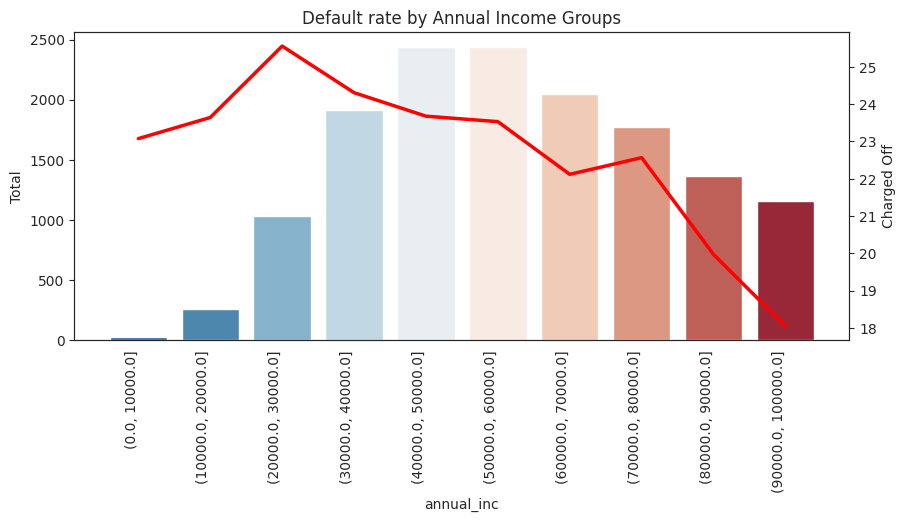

In [10]:
sns.set_style('white')
df_grouped = df_grouped.dropna()
df_grouped_1 = df_grouped_1.dropna()
fig,ax1 = plt.subplots(figsize = (10,4))
sns.barplot(data=df_grouped,x='annual_inc',y='Total',ax=ax1,palette = 'RdBu_r')
ax2 = ax1.twinx()
sns.lineplot(data = df_grouped_1,x = df_grouped_1['annual_inc'].astype(str), y = 'Charged Off', ax= ax2, color = 'r', linewidth = 2.5).set(title = 'Default rate by Annual Income Groups')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, horizontalalignment = 'right')
plt.show()

### 2.2 Public bankruptcies

In [11]:
df_grouped = df.groupby(['pub_rec_bankruptcies','loan_status']).size()
df_grouped_1 = df_grouped.groupby(level = 0).apply(lambda x: x/x.sum()*100).unstack(level = 'loan_status').reset_index()
df_grouped = df_grouped.groupby(level = 0).apply(lambda x: x).unstack(level = 'loan_status').reset_index()
df_grouped['Total'] = df_grouped['Charged Off'] + df_grouped['Fully Paid']

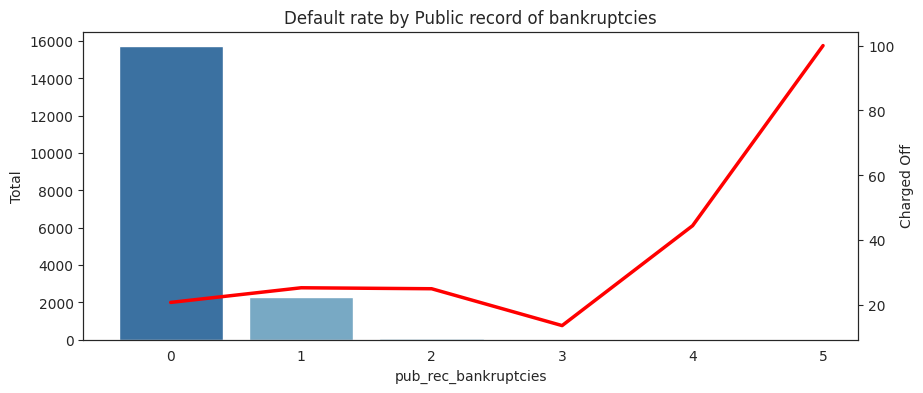

In [12]:
sns.set_style('white')
fig, ax1 = plt.subplots(figsize = (10,4))
sns.barplot(data = df_grouped, x = 'pub_rec_bankruptcies', y = 'Total', ax = ax1, palette = 'RdBu_r')
ax2 = ax1.twinx()
sns.lineplot(data = df_grouped_1, x= 'pub_rec_bankruptcies', y = 'Charged Off', ax= ax2, color = 'r', linewidth = 2.5).set(title = 'Default rate by Public record of bankruptcies')
plt.show()

In [13]:
#Preparation of data for the graph:
df_grouped = df.groupby(['emp_length','loan_status']).size()
df_grouped1=df_grouped.groupby(level=0).apply(lambda x: x/x.sum() * 100).unstack(level='loan_status').reset_index()
df_grouped=df_grouped.groupby(level=0).apply(lambda x: x).unstack(level='loan_status').reset_index()
df_grouped['Total']=df_grouped['Charged Off'] + df_grouped['Fully Paid']
df_grouped['emp_length'] = pd.Categorical(df_grouped['emp_length'],
                                   categories=['< 1 year','1 year','2 years',
                                              '3 years','4 years','5 years',
                                              '6 years','7 years','8 years',
                                              '9 years','10+ years'],
                                   ordered=True)
df_grouped1['emp_length'] = pd.Categorical(df_grouped1['emp_length'],
                                   categories=['< 1 year','1 year','2 years',
                                              '3 years','4 years','5 years',
                                              '6 years','7 years','8 years',
                                              '9 years','10+ years'],
                                   ordered=True)

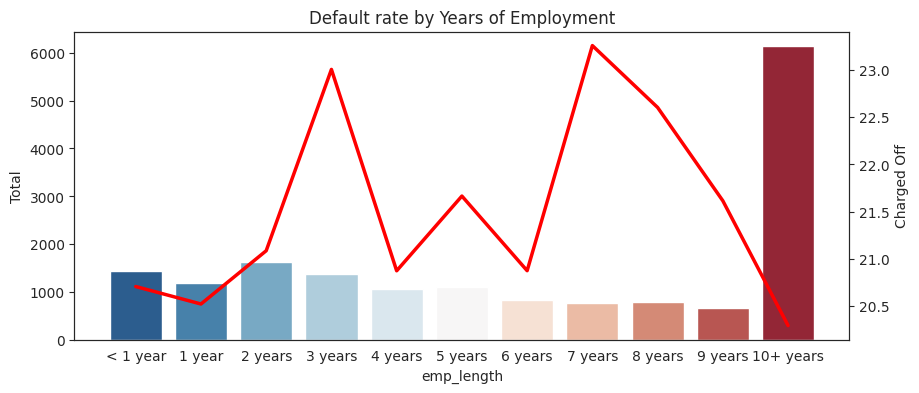

In [14]:
fig, ax1 = plt.subplots(figsize=(10,4))
sns.set_style('white')
sns.barplot(data=df_grouped, x="emp_length", y="Total", ax=ax1, palette='RdBu_r')
ax2 = ax1.twinx()
sns.lineplot(data=df_grouped1, x="emp_length", y="Charged Off",ax=ax2, color='r', linewidth=2.5).set(title='Default rate by Years of Employment')
plt.show()

### 2.3 Loan Amount

In [15]:
df_grouped=df.groupby([pd.cut(df["loan_amnt"], np.arange(0, 1000.0+40000, 5000)),'loan_status']).size()
df_grouped1=df_grouped.groupby(level=0).apply(lambda x: x/x.sum() * 100).unstack(level='loan_status').reset_index()
df_grouped=df_grouped.groupby(level=0).apply(lambda x: x).unstack(level='loan_status').reset_index()
df_grouped['Total']=df_grouped['Charged Off'] + df_grouped['Fully Paid']

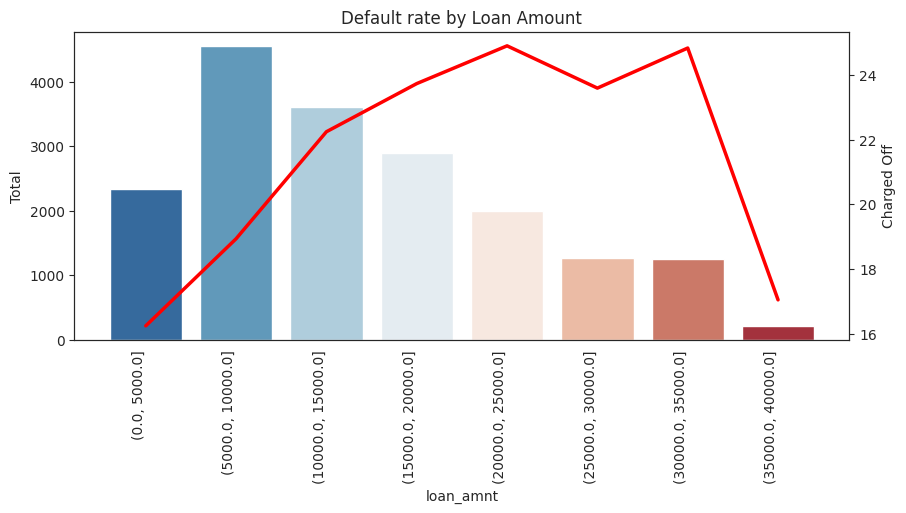

In [16]:
df_grouped=df_grouped.dropna()
df_grouped1=df_grouped1.dropna()
fig, ax1 = plt.subplots(figsize=(10,4))
sns.set_style('white')
sns.barplot(data=df_grouped, x="loan_amnt", y="Total", ax=ax1, palette='RdBu_r')
ax2 = ax1.twinx()
sns.lineplot(data=df_grouped1, x=df_grouped1["loan_amnt"].astype(str), y="Charged Off",ax=ax2, color='r', linewidth=2.5).set(title='Default rate by Loan Amount')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90, horizontalalignment = 'right')
plt.show()

### 2.4 Affordability

The affordability is defined by the ratio of loan amount and annul income

In [17]:
df['inc_ratio'] = df['loan_amnt']/df['annual_inc']
df_grouped=df.groupby([pd.cut(df["inc_ratio"], np.arange(0, 0.1+0.5, 0.1)),'loan_status']).size()
df_grouped1=df_grouped.groupby(level=0).apply(lambda x: x/x.sum() * 100).unstack(level='loan_status').reset_index()
df_grouped=df_grouped.groupby(level=0).apply(lambda x: x).unstack(level='loan_status').reset_index()
df_grouped['Total']=df_grouped['Charged Off'] + df_grouped['Fully Paid']

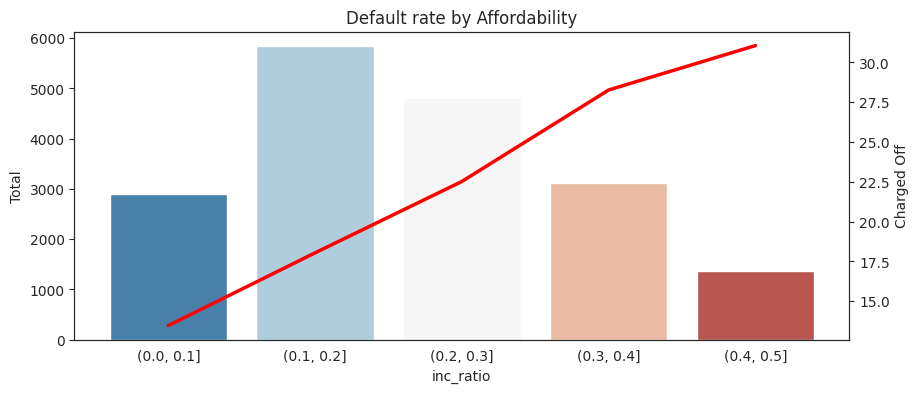

In [18]:
df_grouped=df_grouped.dropna()
df_grouped1=df_grouped1.dropna()
fig, ax1 = plt.subplots(figsize=(10,4))
sns.set_style('white')
sns.barplot(data=df_grouped, x="inc_ratio", y="Total", ax=ax1,palette='RdBu_r')
ax2 = ax1.twinx()
sns.lineplot(data=df_grouped1, x=df_grouped1["inc_ratio"].astype(str), y="Charged Off",ax=ax2, color='r', linewidth=2.5).set(title='Default rate by Affordability')
plt.show()

<Axes: >

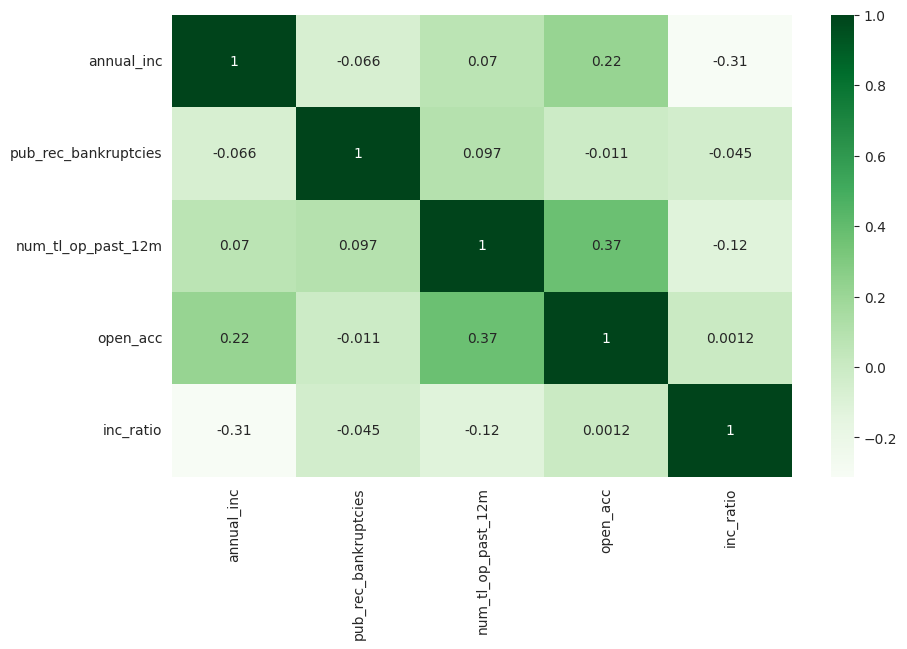

In [56]:
correlation_features = ['annual_inc','pub_rec_bankruptcies','num_tl_op_past_12m','open_acc','inc_ratio']
plt.subplots(figsize=(10,6))
sns.heatmap(df[correlation_features].corr(), annot = True, cmap = 'Greens')

### 2.5 Show the pair plot

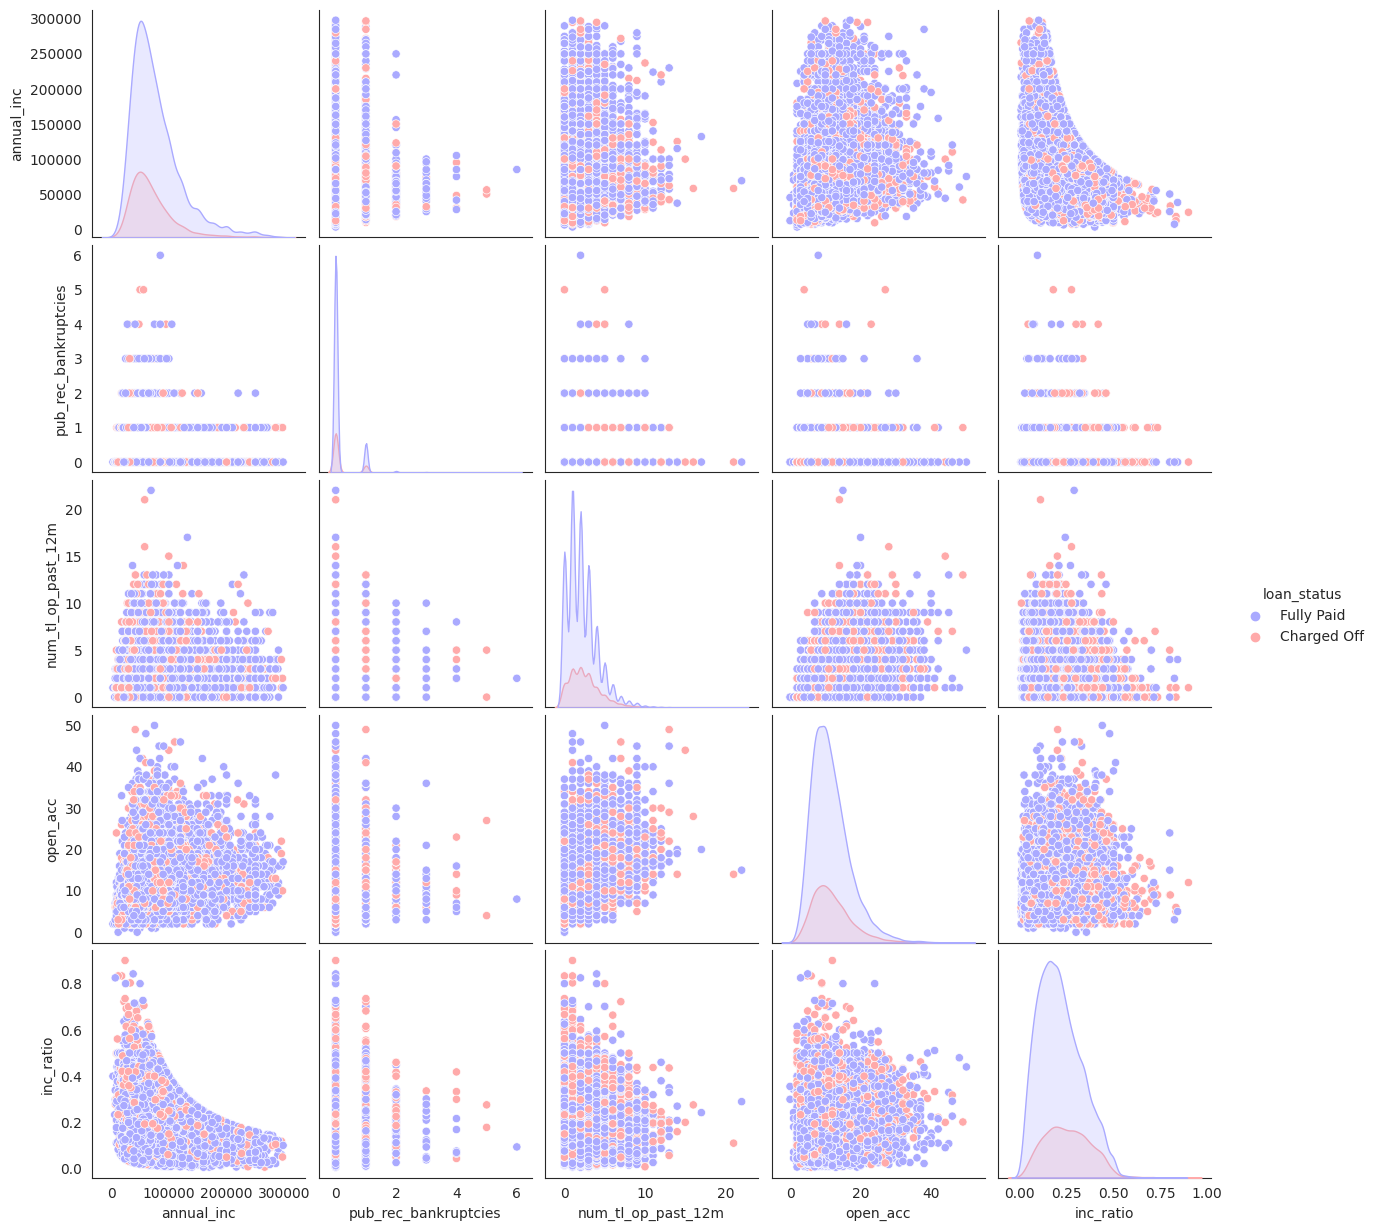

In [53]:
data_check = df[['annual_inc','pub_rec_bankruptcies','num_tl_op_past_12m','open_acc','inc_ratio','loan_status']]
sns.pairplot(data=data_check, hue = 'loan_status', palette = 'bwr')

## 3. Using machine learning model to predic the default.

### 3.1 Logistic Regression model

In [29]:
df['status'] = np.where(df['loan_status'] == 'Charged Off', 1, 0)
home_ownership = pd.get_dummies(df['home_ownership'],drop_first = True)
train = df[['status','inc_ratio','pub_rec_bankruptcies','num_tl_op_past_12m', 'open_acc']].fillna(0)
train = pd.concat([train, home_ownership], axis = 1)

In [70]:
home_ownership

,MORTGAGE,OTHER,OWN,RENT
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
18318,1,0,0,0
18320,1,0,0,0
18321,1,0,0,0
18322,0,0,0,1


In [30]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('status', axis = 1),
                                                    train['status'],
                                                    test_size = 0.30, stratify = train['status'],
                                                    random_state = 10)

In [31]:
logmodel = LogisticRegression(max_iter = 500)
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [32]:
predictions = logmodel.predict(x_test)

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4276
           1       0.60      0.01      0.02      1163

    accuracy                           0.79      5439
   macro avg       0.69      0.50      0.45      5439
weighted avg       0.75      0.79      0.70      5439



In [34]:
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[4268    8]
 [1151   12]]


In [35]:
print('Accuracy of the Logisitic Regression model is', round(accuracy_score(y_test, predictions),2))

Accuracy of the Logisitic Regression model is 0.79


### 3.2 Ramdom Forest model

In [37]:
rf_model = RandomForestClassifier(max_depth= 8, n_estimators = 100, random_state = 42)

In [38]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [39]:
rf_predictions = rf_model.predict(x_test)

In [40]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4276
           1       0.53      0.02      0.03      1163

    accuracy                           0.79      5439
   macro avg       0.66      0.51      0.46      5439
weighted avg       0.73      0.79      0.70      5439



In [41]:
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print(rf_confusion_matrix)

[[4260   16]
 [1145   18]]


In [42]:
print('Accuracy of the Random Forest Model is',
      round(accuracy_score(y_test, rf_predictions),2))

Accuracy of the Random Forest Model is 0.79


In [45]:
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for i in sorted_indices:
  print("{0:25} {1:6}".format(x_train.columns[i],round(importances[i],4)))

inc_ratio                 0.5081
open_acc                  0.1849
num_tl_op_past_12m        0.1771
pub_rec_bankruptcies      0.0539
RENT                       0.035
MORTGAGE                  0.0288
OWN                       0.0121
OTHER                     0.0001


### 3.3 XGBoost model


In [57]:
from xgboost import XGBClassifier

In [58]:
xgb_clf = XGBClassifier(use_label_encoder = False)
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
xgb_predictions = xgb_clf.predict(x_test)
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      4276
           1       0.44      0.07      0.12      1163

    accuracy                           0.78      5439
   macro avg       0.62      0.52      0.50      5439
weighted avg       0.72      0.78      0.71      5439



In [63]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)
print(xgb_confusion_matrix)

[[4173  103]
 [1083   80]]


In [64]:
print('Accuracy of the XGBoost Model is',
      round(accuracy_score(y_test, xgb_predictions),2))

Accuracy of the XGBoost Model is 0.78


## 4. Compare Gini performance for both algorithms

**Gini coefficient**

The Gini coefficient is an industry standard measure of assessing the effectiveness of a scorecard in discriminating between good and bads.

**References**

[1]  https://towardsdatascience.com/clearly-explained-gini-coefficient-and-lorenz-curve-fe6f5dcdc07

[2] https://www.thoughtco.com/calculate-the-gini-coefficient-1147711

In [65]:
log_proba = logmodel.predict_proba(x_test)[:, 1]
rf_proba = rf_model.predict_proba(x_test)[:, 1]
xgb_proba = xgb_clf.predict_proba(x_test)[:, 1]

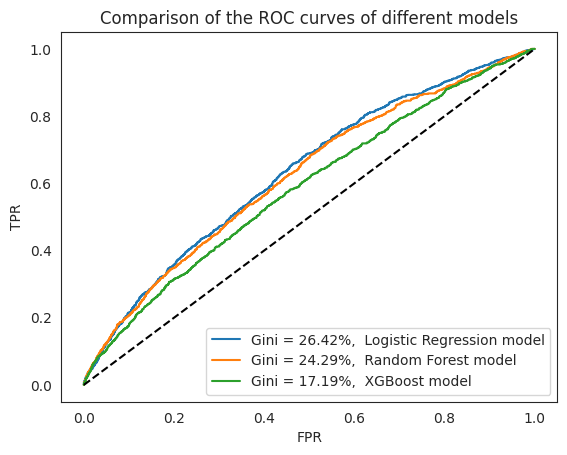

In [67]:
plt.title('Comparison of the ROC curves of different models')
plot_roc(y_test, [(log_proba, 'Logistic Regression model'), (rf_proba, 'Random Forest model'), (xgb_proba, 'XGBoost model')])